<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/AtenuacaoGama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estrutura da Matéria III

Modalidade: Experimental

Alunos: Danielle Lessa, Tayan Sequeira e Úrsula Goulart

Professor: Dr. Wagner de Paula

#Experimento 3: Atenuação Gama


Objetivos: 

1. Medir a atenuação da radiação γ em função da espessura do material interposto entre a fonte e o
detector para diferentes materiais e energias da radiação.
2. Comparar os valores obtidos com valores tabelados.
3. Estudar a dependência da atenuação com a energia e com o número atômico Z do material
absorvedor.

| Placa | Espessura da Placa (Polegadas) |  Contagens [Cs-137 \ 0,032 MeV] |
| :---: | :----------------------------: |  :--------: |
|   -   |               -                |     3400    |
|   G   |             0,020              |     3000    |
|   I   |             0,025              |     2820    |
|   K   |             0,032              |     2480    |
|   M   |             0,040              |     2100    |
|   O   |             0,050              |     1860    |
|   P   |             0,063              |     1800    |


A atenuação pode ser escrita como:

$$I = I_0 e^{-\mu x} \ \ \ \ \ \ \ \ (1)$$ 

Sendo,

$I$ : Intensidade ou número de contagens atenuado

$I_0$: Número de contagens sem atenuação

$\mu$: Coeficiente de atenuação linear

$x$: Espessura da placa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

##Decaimento exponencial decrescente

Plotar gráfico da espessura pela contagem, afim de mostrar que seguem uma exponencial decrescente, isto sendo confirmado, é necessário estimar o coeficiente de atenuação linear.

**Observação:** A primeira linha foi excluída e foi deixado apenas as contagens dos picos atenuados.

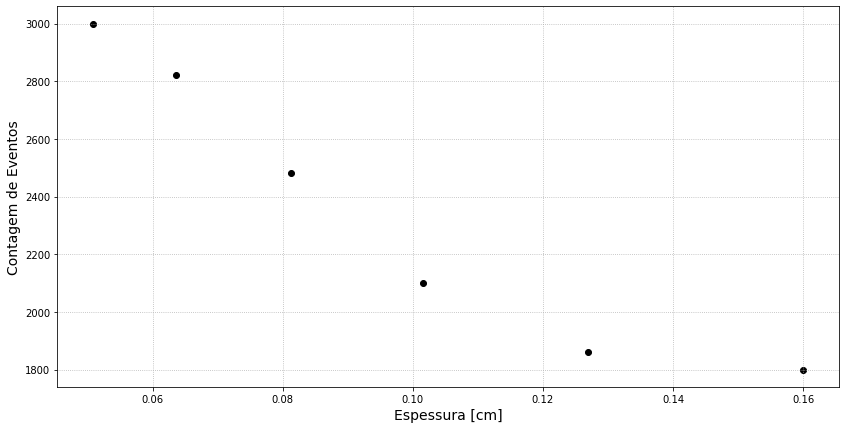

In [ ]:
data = pd.read_table('cs137.tsv', ',')
data['espessura(cm)'] = data['espessura']*2.54
data_missing_row = data.drop(data.index[[0]])

fig = plt.subplots(figsize = (14,7))
plt.scatter(data_missing_row['espessura(cm)'], data_missing_row['contagens'], color='black')
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('Contagem de Eventos', fontsize = 14)
plt.grid(linestyle = 'dotted')

##Determinação do coeficiente de atenuação linear

Da equação (1), tem-se que:

$$\frac{I}{I_0} = e^{- \mu x}$$

O ajuste exponencial tem como equação padrão:

$$y = a e^{-bx} + c$$

Logo,

$y = \frac{I}{I_0}$

$x = x$

In [ ]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

popt, pcov = curve_fit(func, data_missing_row['espessura(cm)'], data_missing_row['contagens']/data['contagens'][0], p0=(1, 4e-4, 1))
errorfunc = [np.sqrt(pcov[i, i]) for i in np.arange(3)] #Diagonal principal da matriz


In [ ]:
popt, errorfunc

(array([ 1.08140697, 16.99637751,  0.44193327]),
 [0.1908919280101201, 5.442179266142758, 0.06850336618826308])

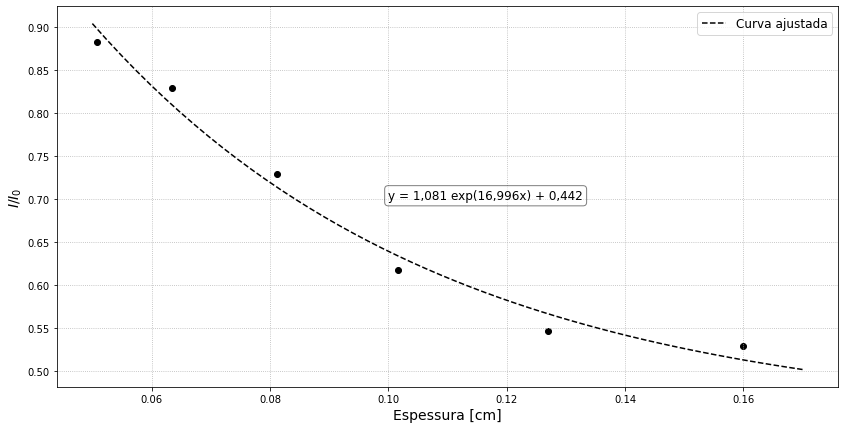

In [ ]:
fig,ax = plt.subplots(figsize = (14,7))

x = np.linspace(0.050, 0.170)
plt.plot(x, func(x, *popt), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data_missing_row['espessura(cm)'], data_missing_row['contagens'] / data['contagens'][0], color='black')
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('$I/I_0$', fontsize=14)
ax.text(0.10, 0.70, 'y = 1,081 exp(16,996x) + 0,442', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5), fontsize = 12)
plt.grid(linestyle = 'dotted')
plt.legend(fontsize = 12)

##Determinação do coeficiente de absorção de massa

O coeficiente de absorção ($\mu / \rho$) será obtido através do ajuste linear da equação de intensidade, escrita do seguinte modo:

$$I = I_0 \ e^{(- \mu / \rho) \ \lambda}$$

A espessura de massa ($\lambda$) é dado por

$$\lambda = \rho x$$

A densidade ($\rho$) encontrada na equação acima é referente ao material absorvedor, ou seja, alumínio ($\rho_{alumínio} = 2,7 g/cm³$)

Logo,

$$\frac{I}{I_0} = e^{(- \mu / \rho) \ \lambda}$$

Aplicando logaritmo nos extremos

$$ln(\frac{I}{I_0}) = - \ \frac{\mu}{\rho} \ \lambda \ \ \ \ \ (2)$$

A equação (2) se assemelha a uma equação do primeiro grau:

$$y = ax + b$$

Sendo,

$y = ln(\frac{I}{I_0})$

$x = \lambda = \rho x$

De acordo com as equações anteriores conseguimos enxergar que o corficiente de absorção de massa ($\mu / \rho$) será dado pelo coeficiente angular ($a$).

In [ ]:
rho = 2.7

def ajuste_linear(x_a, a, b):
  return a*x_a + b

popt_ajuste, pcov_ajuste  = curve_fit(ajuste_linear, rho*data['espessura(cm)'], np.log(data['contagens']/data['contagens'][0]))

error_pcov = [np.sqrt(pcov_ajuste[i, i]) for i in np.arange(2)] #Diagonal principal da matriz

print('a =', popt_ajuste[0], '+-', error_pcov[0], '/ b =', popt_ajuste[1], '+-', error_pcov[1])

a = -1.685622162837798 +- 0.18403663393710137 / b = 0.04429355716071176 +- 0.04798440062879756


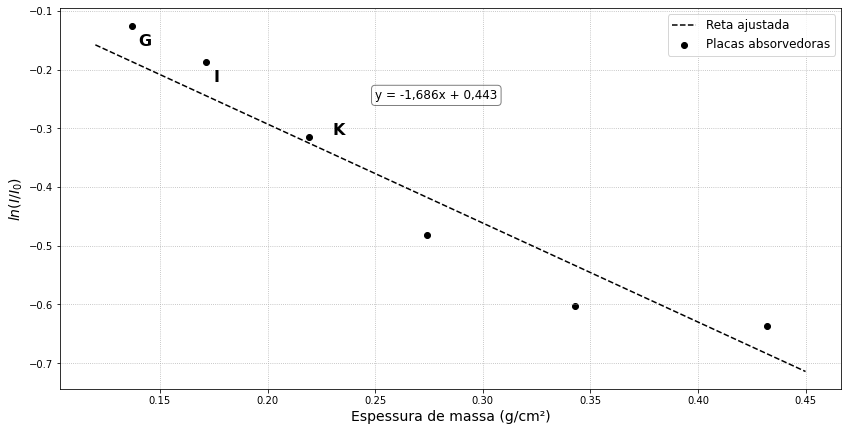

In [169]:
fig, ax = plt.subplots(figsize = (14,7))

xp = np.linspace(0.12, 0.45)
plt.scatter(rho*data_missing_row['espessura(cm)'], np.log(data_missing_row['contagens']/data['contagens'][0]), color = 'black', label = 'Placas absorvedoras')
plt.plot(xp, popt_ajuste[0]*xp + popt_ajuste[1], color = 'black', linestyle = '--', label = 'Reta ajustada')
plt.xlabel('Espessura de massa (g/cm²)', fontsize = 14)
plt.ylabel('$ln(I/I_0)$', fontsize = 14)
ax.text(0.25, -0.25, 'y = -1,686x + 0,443',bbox=dict(boxstyle='round', facecolor='white', alpha=0.5), fontsize = 12)
ax.text(0.14, -0.16, 'G', weight = 'bold', fontsize = 16)
ax.text(0.175, -0.22, 'I', weight = 'bold', fontsize = 16)
ax.text(0.23, -0.31, 'K', weight = 'bold', fontsize = 16)
#ax.text(0.14, -0.1, 'M', weight = 'bold', fontsize = 16)
#ax.text(0.14, -0.1, 'O', weight = 'bold', fontsize = 16)
#ax.text(0.14, -0.1, 'P', weight = 'bold', fontsize = 16)

plt.legend(fontsize= 12)
plt.grid(linestyle = 'dotted')